In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
e_customer = pd.read_csv("Ecommerce Customers")

In [3]:
e_customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
e_customer.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
e_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
e_customer_columns = e_customer.columns
e_customer_columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
for i in e_customer_columns:
    print(e_customer[i].unique())

['mstephenson@fernandez.com' 'hduke@hotmail.com' 'pallen@yahoo.com'
 'riverarebecca@gmail.com' 'mstephens@davidson-herman.com'
 'alvareznancy@lucas.biz' 'katherine20@yahoo.com' 'awatkins@yahoo.com'
 'vchurch@walter-martinez.com' 'bonnie69@lin.biz' 'andrew06@peterson.com'
 'ryanwerner@freeman.biz' 'knelson@gmail.com' 'wrightpeter@yahoo.com'
 'taylormason@gmail.com' 'jstark@anderson.com' 'wjennings@gmail.com'
 'rebecca45@hale-bauer.biz' 'alejandro75@hotmail.com'
 'samuel46@love-west.net' 'megan33@gmail.com' 'agolden@yahoo.com'
 'vstafford@hotmail.com' 'denise22@hernandez-townsend.com'
 'youngbarbara@yahoo.com' 'william25@mcconnell.com'
 'ijones@schaefer-carr.net' 'heatherhall@yahoo.com'
 'tinasmith@martinez.info' 'chasejennifer@hotmail.com'
 'jenniferbarnett@gmail.com' 'jared39@hotmail.com'
 'briancarlson@page-fleming.com' 'joshuaodom@gmail.com'
 'vickie90@lee-wilson.com' 'duane56@hotmail.com' 'enash@gmail.com'
 'sandraharrison@bailey-gordon.net' 'cunninghamwilliam@hotmail.com'
 'teresaa

In [8]:
e_customer.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

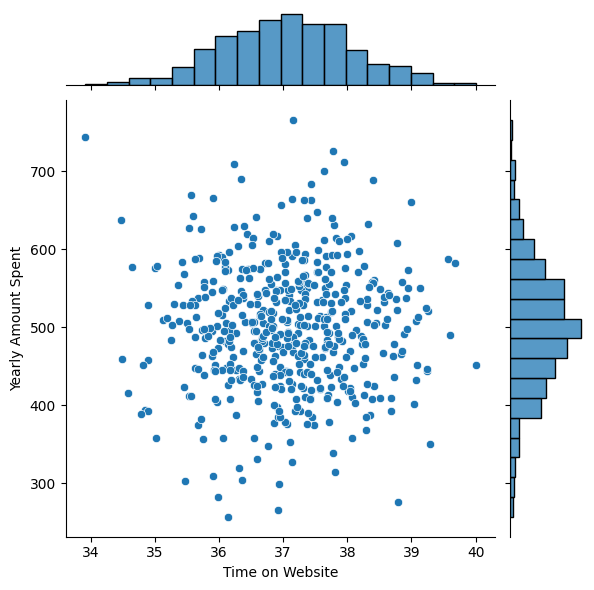

In [9]:
sns.jointplot(data= e_customer, x= "Time on Website", y= "Yearly Amount Spent")

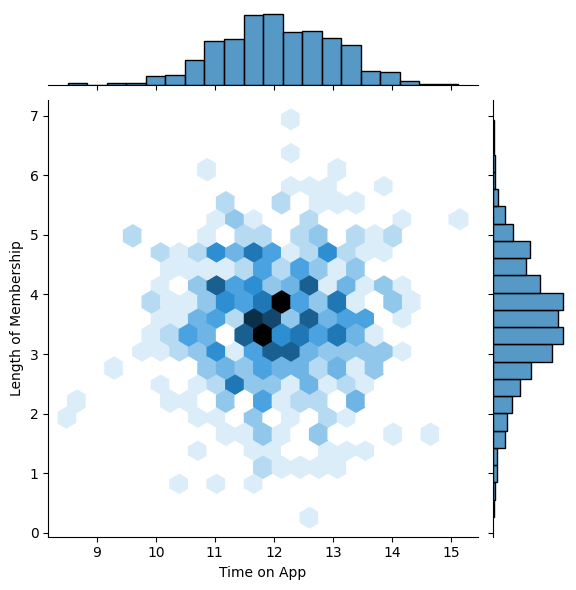

In [10]:
sns.jointplot(data= e_customer, x= "Time on App", y= "Length of Membership", kind= "hex")

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


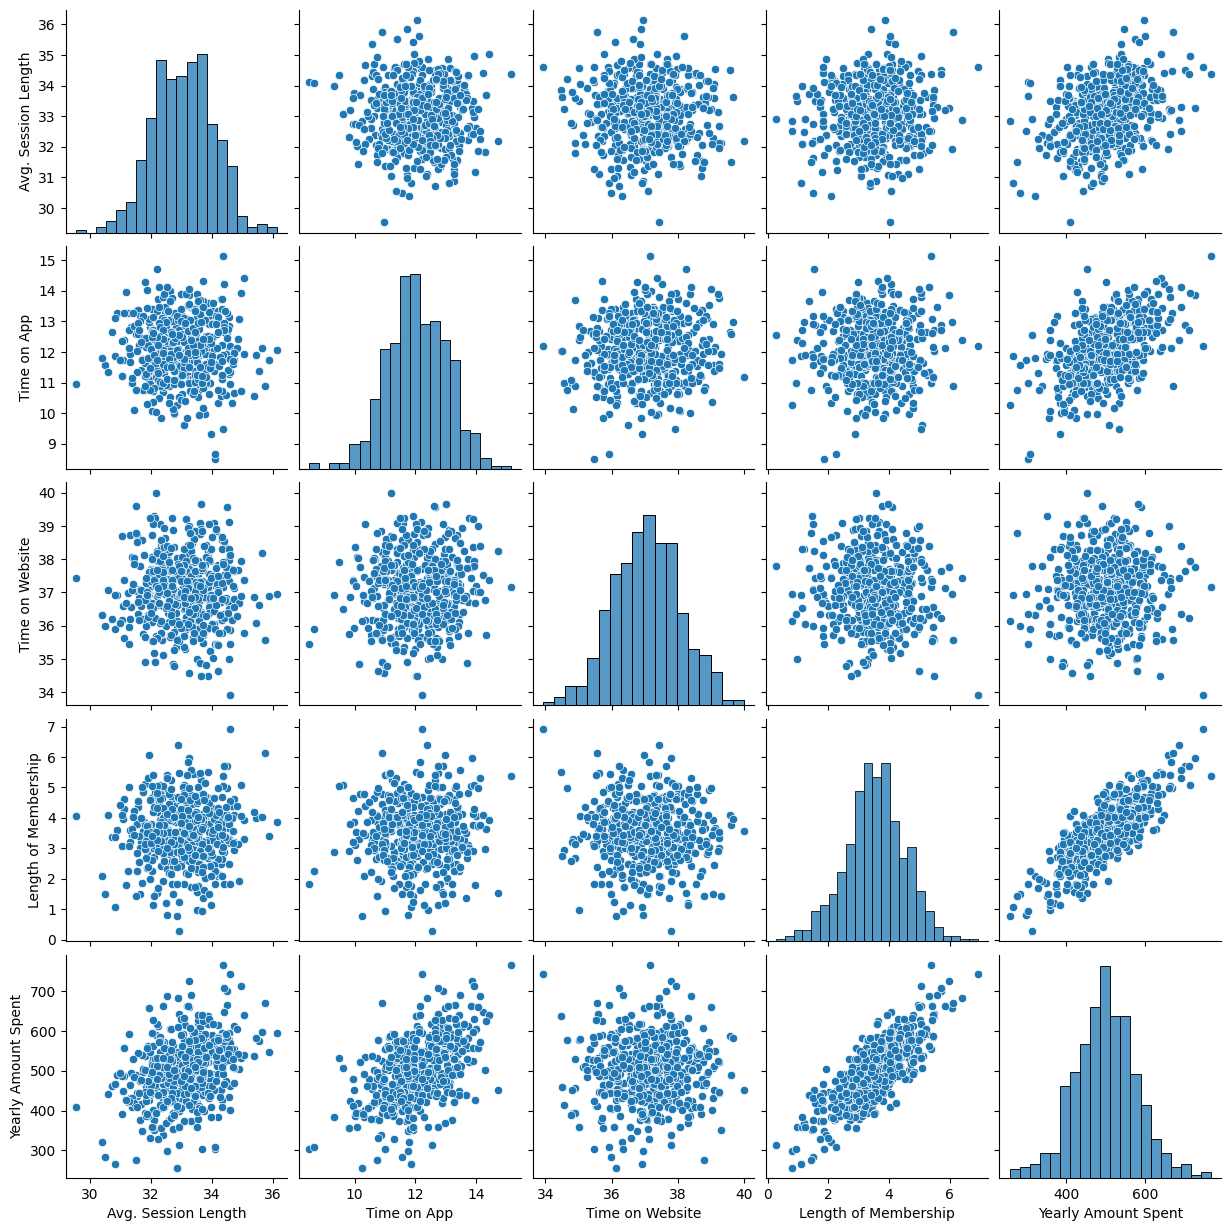

In [11]:
sns.pairplot(e_customer)

Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?
Length of Membership

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


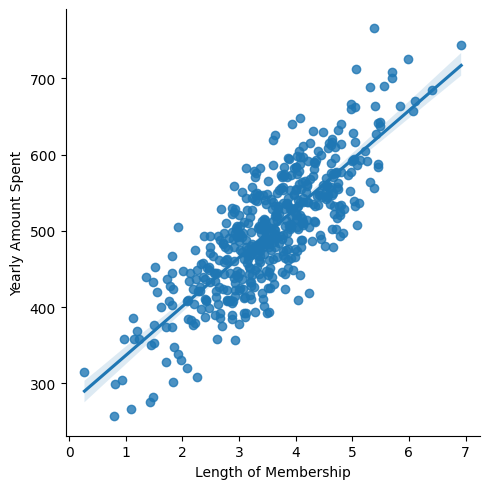

In [12]:
sns.lmplot(data= e_customer, x= "Length of Membership", y= "Yearly Amount Spent")

In [13]:
X = e_customer[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y= e_customer["Yearly Amount Spent"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 101)

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
print("Coefficients:\n", lr.coef_)

Coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [18]:
Prediction = lr.predict(X_test)
Prediction

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Text(0.5, 1.0, 'Real Test Values versus The Predicted Values')

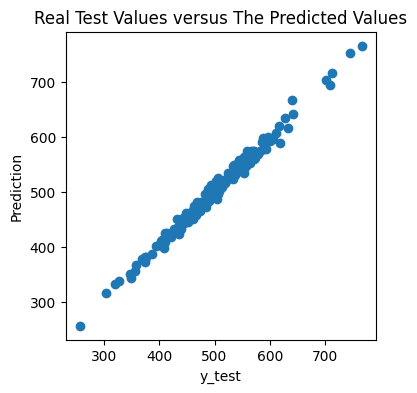

In [19]:
plt.subplots(figsize= (4, 4))
plt.scatter(y_test, Prediction)
plt.xlabel("y_test")
plt.ylabel("Prediction")
plt.title("Real Test Values versus The Predicted Values")

In [20]:
print("MAE : ", metrics.mean_absolute_error(y_test, Prediction))
print("MSE : ", metrics.mean_squared_error(y_test, Prediction))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

MAE :  7.228148653430834
MSE :  79.81305165097443
RMSE :  8.933815066978633


(array([ 1.,  5., 15., 34., 36., 27., 25.,  5.,  1.,  1.]),
 array([-26.95573072, -21.26030045, -15.56487019,  -9.86943992,
         -4.17400966,   1.5214206 ,   7.21685087,  12.91228113,
         18.6077114 ,  24.30314166,  29.99857192]),
 <BarContainer object of 10 artists>)

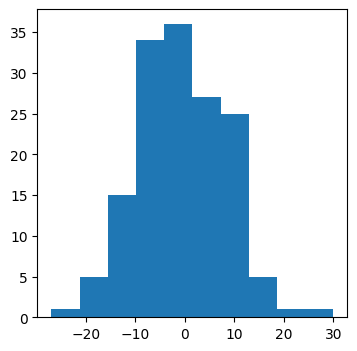

In [21]:
plt.subplots(figsize= (4, 4))
plt.hist(y_test - Prediction)

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


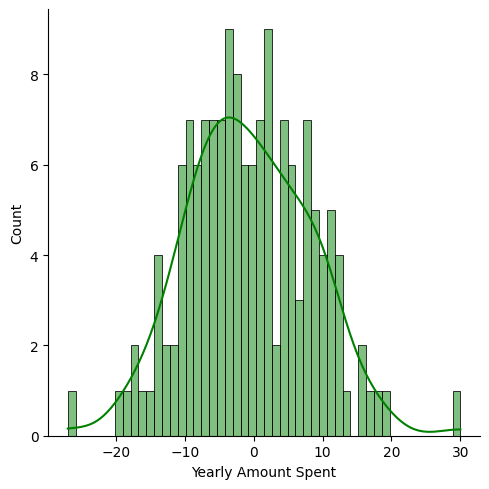

In [22]:
sns.displot((y_test - Prediction), kde= True, bins= 50, color= "g")

In [23]:
df_Coefficient = pd.DataFrame(lr.coef_, X.columns, columns= ["Coefficient"])
df_Coefficient

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
